# Лабораторная работа №1

#### Импорт ввсех необходимых модулей

In [1]:
#! /usr/bin/env pthon3
# -*- coding: utf-8 -*-

In [89]:
from ipywidgets import interact
from ipywidgets import widgets 
from IPython.display import display
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import axes
from matplotlib import rcParams, rc
from random import uniform
from scipy.interpolate import PchipInterpolator

In [48]:
from lib.InterpolationLagrange import InterpolationLagrange
from lib.InterpolationNewton import InterpolationNewton
from lib.InterpolationSpline import InterpolationSpline

<function __main__.get_results>

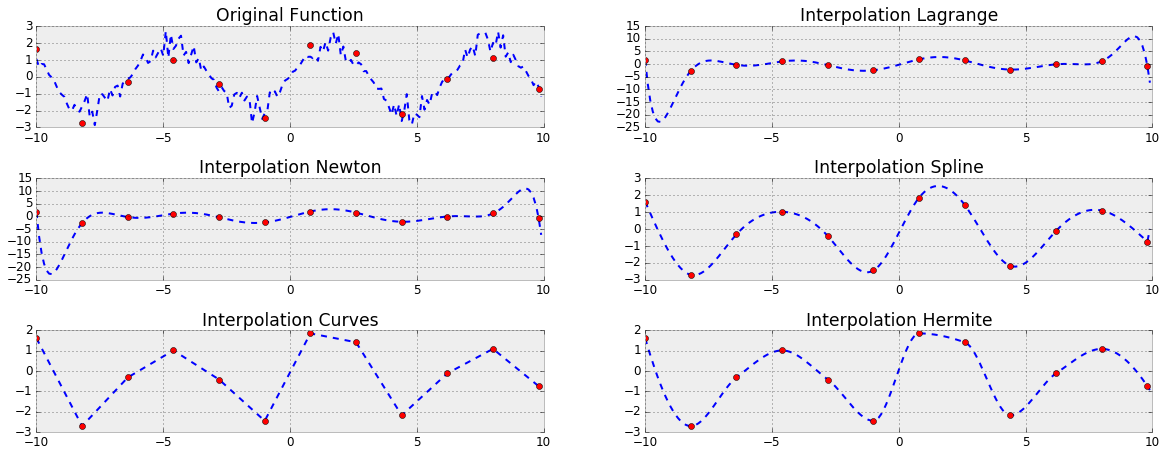

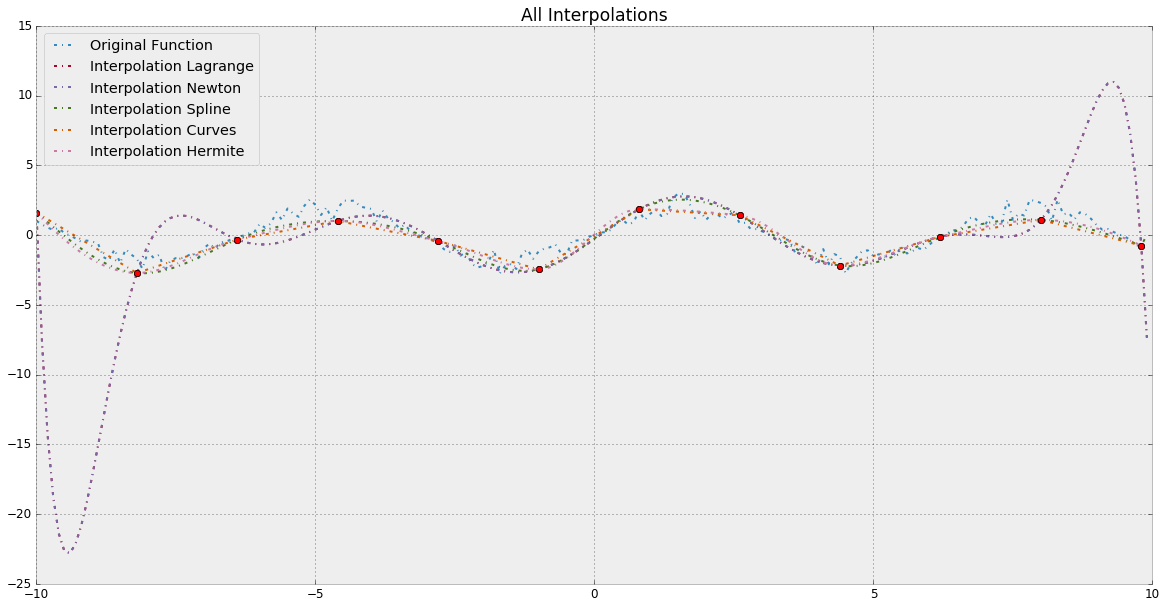

In [90]:
rcParams['figure.figsize'] = (20.0, 10.0)
rcParams['font.size'] = 12

x = np.arange(-10, 10, 0.1)
# original_function = lambda x: (x+2)*np.sin(x)/(12/np.cos(x)/80)
# original_function = lambda x: x**2-(x+2)*np.sin(x)/(12/np.cos(x)/80)
original_function = lambda x: np.sin(x) * uniform(1,3)

plt.style.use('bmh')

def get_results(step_count):
    distance = round(x.size / step_count) + 1
    initial_x = []
    initial_y = []
    for num, item in enumerate(x):
        if num % distance == 0:
            initial_x.append(item)
            initial_y.append(original_function(item))

    interpoation_list = [
        { 
            'label': 'Original Function', 
            'get_y': np.vectorize(original_function),
            'get_x': x
        },
        { 
            'label': 'Interpolation Lagrange', 
            'get_y': InterpolationLagrange(initial_x, initial_y).get_list,
            'get_x': x
        },
        { 
            'label': 'Interpolation Newton', 
            'get_y': InterpolationNewton(initial_x, initial_y).get_list,
            'get_x': x
        },
        { 
            'label': 'Interpolation Spline', 
            'get_y': InterpolationSpline(initial_x, initial_y).get_list,
            'get_x': x
        },
        { 
            'label': 'Interpolation Curves', 
            'get_y': lambda _: initial_y,
            'get_x': initial_x
        },
        { 
            'label': 'Interpolation Hermite', 
            'get_y': PchipInterpolator(initial_x, initial_y),
            'get_x': x
        },
    ]

    plt.figure(0).subplots_adjust(hspace=.5)
    for pos, interpolation in enumerate(interpoation_list):
        ax = plt.subplot(4, 2, pos + 1)
        ax.set_title(interpolation['label'])
        plt.plot(interpolation['get_x'], interpolation['get_y'](x), 'b--')
        plt.plot(initial_x, initial_y, 'ro')
      
    plt.figure(1)
    ax = plt.subplot(1, 1, 1)
    ax.set_title('All Interpolations')
    plt.plot(initial_x, initial_y, 'ro')
    for pos, interpolation in enumerate(interpoation_list):
        plt.plot(
            interpolation['get_x'], 
            interpolation['get_y'](x), 
            '-.',
            label=interpolation['label']
        )
        plt.plot(initial_x, initial_y, 'ro')
    plt.legend(loc='upper left')
    
    
interact(get_results, step_count=widgets.IntSlider(min=1,max=20,step=1,value=12))